# Machine Learning Assn 2

Author: Xiaolan Li

- Random Forest
- K-Nearest Neighbors
- Naïve-Bayes Classifier
- Principal Component Analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statistics import mode

# 1. Random Forest

In [2]:
cancer = load_breast_cancer()
data = pd.DataFrame(cancer.data, columns=[cancer.feature_names])
data['Target'] = pd.Series(data=cancer.target, index=data.index)
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
X=data.iloc[:,:-1]  
y=data.iloc[:,-1] 
# Split dataset into training set and test set with 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  # setting random_state to make sure we have the same data result after split

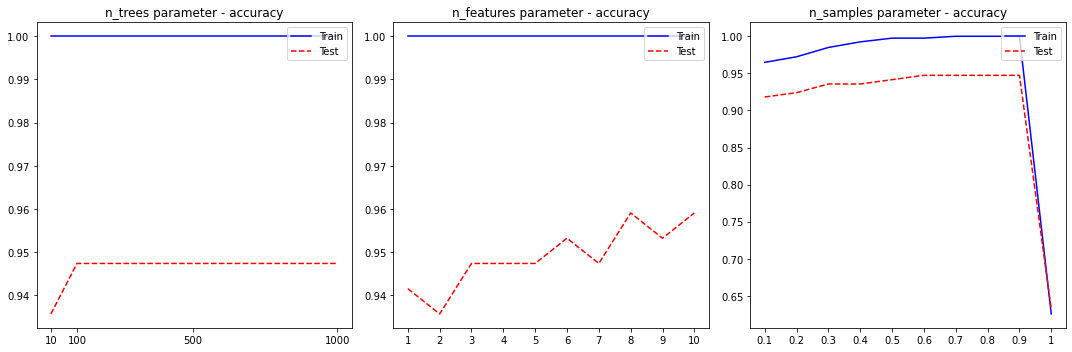

In [4]:
n_trees = [10,100,500,1000]
n_features = [1,2,3,4,5,6,7,8,9,10]
n_samples = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
fig, axs = plt.subplots(1, 3)

tree_train_scores = []
tree_test_scores = []

feature_train_scores = []
feature_test_scores = []

sample_train_scores = []
sample_test_scores = []

for n_tree in n_trees:
    clf=RandomForestClassifier(n_estimators=n_tree, random_state=1)
    clf.fit(X_train,y_train)
    y_pred_train=clf.predict(X_train)
    y_pred_test=clf.predict(X_test)
    tree_train_scores.append(metrics.accuracy_score(y_train, y_pred_train))
    tree_test_scores.append(metrics.accuracy_score(y_test, y_pred_test))
axs[0].plot(n_trees, tree_train_scores, '-b', label='Train')
axs[0].plot(n_trees, tree_test_scores, '--r', label='Test')
axs[0].set_title('n_trees parameter - accuracy')
axs[0].set_xticks(n_trees)
axs[0].set_xticklabels(n_trees)
axs[0].legend(loc='upper right')

for n_feature in n_features:
    clf=RandomForestClassifier(max_features=n_feature, random_state=1)
    clf.fit(X_train,y_train)
    y_pred_train=clf.predict(X_train)
    y_pred_test=clf.predict(X_test)
    feature_train_scores.append(metrics.accuracy_score(y_train, y_pred_train))
    feature_test_scores.append(metrics.accuracy_score(y_test, y_pred_test))
axs[1].plot(n_features, feature_train_scores, '-b', label='Train')
axs[1].plot(n_features, feature_test_scores, '--r', label='Test')
axs[1].set_title('n_features parameter - accuracy')
axs[1].set_xticks(n_features)
axs[1].set_xticklabels(n_features)
axs[1].legend(loc='upper right')

for n_sample in n_samples:
    clf=RandomForestClassifier(max_samples=n_sample, random_state=1)
    clf.fit(X_train,y_train)
    y_pred_train=clf.predict(X_train)
    y_pred_test=clf.predict(X_test)
    sample_train_scores.append(metrics.accuracy_score(y_train, y_pred_train))
    sample_test_scores.append(metrics.accuracy_score(y_test, y_pred_test))
axs[2].plot(n_samples, sample_train_scores, '-b', label='Train')
axs[2].plot(n_samples, sample_test_scores, '--r', label='Test')
axs[2].set_title('n_samples parameter - accuracy')
axs[2].set_xticks(n_samples)
axs[2].set_xticklabels(n_samples)
axs[2].legend(loc='upper right')

fig.tight_layout()

From above plot, we found:
- In the tree parameters, when number of trees more than 100, it has highest and stable test accuracy score close to 94.7% meanwhile the train accuracy score is 100% with all tree values.
- In the feature parameters, when number of features is 8, it has highest test accuracy score close to 96% meanwhile the train accuracy score is 100% with all feature values.
- In the sample parameters, when percentage of samples is 0.7, it has highest test accuracy score close to 95% meanwhile the train accuracy score is 100% with 0.9 percentage samples.

In [5]:
arr_tree = list(map(lambda x,y,z: [x,y,z], n_trees,tree_train_scores,tree_test_scores))
df_tree = pd.DataFrame(arr_tree, index=['tree']*len(arr_tree), columns=['n_parameter','train_accuracy_score','test_accuracy_score'])

arr_feature = list(map(lambda x,y,z: [x,y,z], n_features,feature_train_scores,feature_test_scores))
df_feature = pd.DataFrame(arr_feature, index=['feature']*len(arr_feature), columns=['n_parameter','train_accuracy_score','test_accuracy_score'])

arr_sample = list(map(lambda x,y,z: [x,y,z], n_samples,sample_train_scores,sample_test_scores))
df_sample = pd.DataFrame(arr_sample, index=['sample']*len(arr_sample), columns=['n_parameter','train_accuracy_score','test_accuracy_score'])

pd.concat([df_tree, df_feature, df_sample]).sort_values(by='test_accuracy_score', ascending=False)

,n_parameter,train_accuracy_score,test_accuracy_score
feature,10.0,1.000000,0.959064
feature,8.0,1.000000,0.959064
feature,9.0,1.000000,0.953216
feature,6.0,1.000000,0.953216
sample,0.7,1.000000,0.947368
sample,0.8,1.000000,0.947368
tree,100.0,1.000000,0.947368
feature,7.0,1.000000,0.947368
feature,5.0,1.000000,0.947368
feature,4.0,1.000000,0.947368


From the table after I sort the test accuracy score, the model with 10 or 8 features has highest accuracy score 95.9% in test data.

# 2. K-Nearest	Neighbors

In [6]:
df_orig_auto = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', header=None)
pd.set_option('max_columns', None)
df_orig_auto

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [7]:
df_auto = df_orig_auto.copy()
df_auto = df_auto.replace('?', np.nan)
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       205 non-null    int64  
 1   1       164 non-null    object 
 2   2       205 non-null    object 
 3   3       205 non-null    object 
 4   4       205 non-null    object 
 5   5       203 non-null    object 
 6   6       205 non-null    object 
 7   7       205 non-null    object 
 8   8       205 non-null    object 
 9   9       205 non-null    float64
 10  10      205 non-null    float64
 11  11      205 non-null    float64
 12  12      205 non-null    float64
 13  13      205 non-null    int64  
 14  14      205 non-null    object 
 15  15      205 non-null    object 
 16  16      205 non-null    int64  
 17  17      205 non-null    object 
 18  18      201 non-null    object 
 19  19      201 non-null    object 
 20  20      205 non-null    float64
 21  21      203 non-null    object 
 22  22

In [8]:
df_auto.isnull().sum()

0      0
1     41
2      0
3      0
4      0
5      2
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     4
19     4
20     0
21     2
22     2
23     0
24     0
25     4
dtype: int64

In [9]:
# transform some of the object column type to numeric for further computaion
cols = df_auto.columns.drop([2,3,4,5,6,7,8,14,15,17])
df_auto[cols] = df_auto[cols].apply(pd.to_numeric)

In [10]:
# Using mean value to fill all missing data in numerical column 
df_auto[[1,18,19,21,22,25]] = df_auto[[1,18,19,21,22,25]].apply(lambda x: x.fillna(x.mean()),axis=0)
# Using mode value to fill missing data in categorical column 
df_auto[5].fillna(df_auto.mode()[5][0], inplace=True)

In [11]:
# encoding all categorical columns for further computation
df_auto_cat = np.array(df_auto.select_dtypes(include=['object']).columns)
le_name_mapping = []
for cat in df_auto_cat.reshape(-1,1):
    le = preprocessing.LabelEncoder()
    df_auto[cat] = df_auto[cat].apply(le.fit_transform)
    le_name_mapping.append(dict(zip(le.classes_, le.transform(le.classes_))))
print(le_name_mapping)
df_auto

[{'alfa-romero': 0, 'audi': 1, 'bmw': 2, 'chevrolet': 3, 'dodge': 4, 'honda': 5, 'isuzu': 6, 'jaguar': 7, 'mazda': 8, 'mercedes-benz': 9, 'mercury': 10, 'mitsubishi': 11, 'nissan': 12, 'peugot': 13, 'plymouth': 14, 'porsche': 15, 'renault': 16, 'saab': 17, 'subaru': 18, 'toyota': 19, 'volkswagen': 20, 'volvo': 21}, {'diesel': 0, 'gas': 1}, {'std': 0, 'turbo': 1}, {'four': 0, 'two': 1}, {'convertible': 0, 'hardtop': 1, 'hatchback': 2, 'sedan': 3, 'wagon': 4}, {'4wd': 0, 'fwd': 1, 'rwd': 2}, {'front': 0, 'rear': 1}, {'dohc': 0, 'dohcv': 1, 'l': 2, 'ohc': 3, 'ohcf': 4, 'ohcv': 5, 'rotor': 6}, {'eight': 0, 'five': 1, 'four': 2, 'six': 3, 'three': 4, 'twelve': 5, 'two': 6}, {'1bbl': 0, '2bbl': 1, '4bbl': 2, 'idi': 3, 'mfi': 4, 'mpfi': 5, 'spdi': 6, 'spfi': 7}]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,122.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,0,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,21,1,0,0,3,2,0,109.1,188.8,68.9,55.5,2952,3,2,141,5,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,21,1,1,0,3,2,0,109.1,188.8,68.8,55.5,3049,3,2,141,5,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,21,1,0,0,3,2,0,109.1,188.8,68.9,55.5,3012,5,3,173,5,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,21,0,1,0,3,2,0,109.1,188.8,68.9,55.5,3217,3,3,145,3,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [12]:
# verify there's no categorical values and missing values in the data
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       205 non-null    int64  
 1   1       205 non-null    float64
 2   2       205 non-null    int32  
 3   3       205 non-null    int32  
 4   4       205 non-null    int32  
 5   5       205 non-null    int32  
 6   6       205 non-null    int32  
 7   7       205 non-null    int32  
 8   8       205 non-null    int32  
 9   9       205 non-null    float64
 10  10      205 non-null    float64
 11  11      205 non-null    float64
 12  12      205 non-null    float64
 13  13      205 non-null    int64  
 14  14      205 non-null    int32  
 15  15      205 non-null    int32  
 16  16      205 non-null    int64  
 17  17      205 non-null    int32  
 18  18      205 non-null    float64
 19  19      205 non-null    float64
 20  20      205 non-null    float64
 21  21      205 non-null    float64
 22  22

In [13]:
def knn(data, query, k, distance_fn):
    neighbor_distances_and_indices = []
    for index in range(len(df_auto)):
        example = df_auto.iloc[index]
        distance = distance_fn(example, query)
        neighbor_distances_and_indices.append((distance, index))
        
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]
    return k_nearest_distances_and_indices

def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
    return math.sqrt(sum_squared_distance)

# map query to encoding format for categorical data
query=[1,100,'bmw','gas','std','four','sedan','fwd','front',100.0,170.0,65.0,50.0,2000,'rotor','four',200,'mfi',3.0,3.0,15,200,5000,23,27,30000]
query_encoding = query.copy()
for cat_index, map_index in zip(df_auto_cat, range(len(le_name_mapping))):
    encoding = le_name_mapping[map_index].get(query[cat_index])
    query_encoding[cat_index]=encoding
print('Get recommend for query', query)
print('The encoding for query is', query_encoding)

Get recommend for query [1, 100, 'bmw', 'gas', 'std', 'four', 'sedan', 'fwd', 'front', 100.0, 170.0, 65.0, 50.0, 2000, 'rotor', 'four', 200, 'mfi', 3.0, 3.0, 15, 200, 5000, 23, 27, 30000]
The encoding for query is [1, 100, 2, 1, 0, 0, 3, 1, 0, 100.0, 170.0, 65.0, 50.0, 2000, 6, 2, 200, 4, 3.0, 3.0, 15, 200, 5000, 23, 27, 30000]


In [14]:
k_nearest_neighbors = knn(df_auto, query_encoding, k=5, distance_fn=euclidean_distance)
index = [i for distance, i in k_nearest_neighbors]
df_orig_auto.iloc[index]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
69,0,93,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,54.9,3495,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,28176
70,-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,56.3,3770,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,31600
68,-1,93,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,190.9,70.3,58.7,3750,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,28248
126,3,?,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207,5900,17,25,32528


In [15]:
k_nearest_neighbors = knn(df_auto, query_encoding, k=10, distance_fn=euclidean_distance)
index = [i for distance, i in k_nearest_neighbors]
df_orig_auto.iloc[index]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
69,0,93,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,54.9,3495,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,28176
70,-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,56.3,3770,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,31600
68,-1,93,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,190.9,70.3,58.7,3750,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,28248
126,3,?,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207,5900,17,25,32528
47,0,145,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250
127,3,?,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207,5900,17,25,34028
71,-1,?,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,202.6,71.7,56.5,3740,ohcv,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184
67,-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,190.9,70.3,56.5,3515,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,25552
72,3,142,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,180.3,70.5,50.8,3685,ohcv,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056


Recommended auto for 5 and 10 K_nearest neighbors are shown as above.

# 3. Naïve-Bayes Classifier

In [16]:
color=['red','blue','green','blue','blue','blue','red','green','green','blue','blue','red']
shape=['square','circle','square','square','square','circle','square','circle','square','circle','square','square']
label=['plus','plus','plus','minus','minus','plus','plus','minus','plus','minus','plus','minus']

le = preprocessing.LabelEncoder()
color_encoded=le.fit_transform(color)
le_color_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

le = preprocessing.LabelEncoder()
shape_encoded=le.fit_transform(shape)
le_shape_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

le = preprocessing.LabelEncoder()
label_encoded=le.fit_transform(label)
le_label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

#Combinig color and shape into single list of tuples
features_encoded=zip(color_encoded,shape_encoded)
features_encoded = list(features_encoded)

model = GaussianNB()
# Train the model using the training sets
model.fit(features_encoded,label_encoded)

# predict test sample 1
samples1 = ['blue','square']
print('samples1', samples1)
samples1[0] = le_color_mapping.get(samples1[0])
samples1[1] = le_shape_mapping.get(samples1[1])
print('encoding samples1', samples1)

#Predict Output
predicted_1= model.predict([samples1])
# decoding value
predicted_1 = list(le_label_mapping.keys())[list(le_label_mapping.values()).index(predicted_1)]
print('predicted1: ', predicted_1)

print('***********************')

# predict test sample 2
samples2 = ['yellow','square']
print('samples2', samples2)
# since the color in the test data is not exist in the train data, we have to get the mode color when shape is square.
df_features=pd.DataFrame(list(zip(color,shape)), columns=['color','shape'])
mode_colors = df_features[df_features['shape']==samples2[1]]['color'].mode()
print(' ')
# Using loop in case the mode color has two or more
predicted2 = []
for color in mode_colors:
    modified_samples2 = [color,samples2[1]]
    print('modified_samples2', modified_samples2)
    modified_samples2[0] = le_color_mapping.get(modified_samples2[0])
    modified_samples2[1] = le_shape_mapping.get(modified_samples2[1])
    print('encoding modified_samples2', modified_samples2)

    predicted_modified2= model.predict([modified_samples2])
    predicted_modified2 = list(le_label_mapping.keys())[list(le_label_mapping.values()).index(predicted_modified2)]
    print('predicted modified 2: ', predicted_modified2)
    predicted2.append(predicted_modified2)
    print('------------------------')
print('final predicted2: ', mode(predicted2))

samples1 ['blue', 'square']
encoding samples1 [0, 1]
predicted1:  plus
***********************
samples2 ['yellow', 'square']
 
modified_samples2 ['blue', 'square']
encoding modified_samples2 [0, 1]
predicted modified 2:  plus
------------------------
modified_samples2 ['red', 'square']
encoding modified_samples2 [2, 1]
predicted modified 2:  plus
------------------------
final predicted2:  plus


The predictive results for two test data are all plus.

# 4. Principal Component Analysis

In [17]:
df_heart = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv')
df_heart

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [18]:
X=df_heart.iloc[:,:-1]  
y=df_heart.iloc[:,-1] 
# Split dataset into training set and test set with 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  # setting random_state to make sure we have the same data result after split

In [19]:
# Doing scaler for the data
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [20]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvalues \n%s' % eigen_vals)
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

Eigenvalues 
[1.78158016 1.52422741 1.26398633 0.51344385 1.19887063 1.07345763
 0.60944264 0.69831463 0.74689024 0.83372213 0.88804345 0.9257132 ]


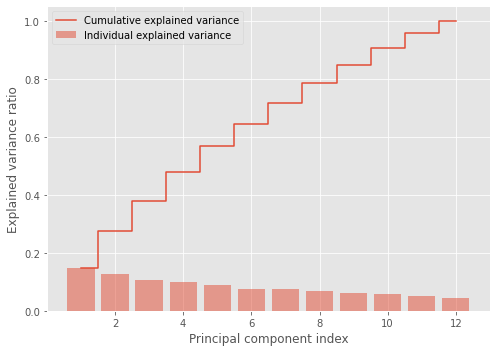

In [21]:
plt.figure(figsize=(7,5))
plt.style.use('ggplot')
plt.bar(range(1, len(var_exp)+1), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(var_exp)+1), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [22]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

test_scores_pca = []
# feature transformation
matrix_w = eigen_pairs[0][1][:, np.newaxis]
# choose number of component for percentage of PC from 60% to 70%, 80% and 90% are 6,7,8,10
for feature in [6,7,8,10]:
    for i in range(1, feature):  
        matrix_w = np.hstack((matrix_w, eigen_pairs[i][1][:, np.newaxis]))
        
    X_train_pca = X_train_std.dot(matrix_w)
    X_test_pca = X_test_std.dot(matrix_w)

    lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs',max_iter=200)
    lr = lr.fit(X_train_pca, y_train)
    y_pred_test_pca=lr.predict(X_test_pca)
    test_scores_pca.append(round(metrics.accuracy_score(y_test, y_pred_test_pca),2))
print('test_scores_pca from 60% to 70%, 80% and 90%: ', test_scores_pca)

test_scores_pca from 60% to 70%, 80% and 90%:  [0.79, 0.8, 0.8, 0.8]


Text(0, 0.5, 'Test accuracy score')

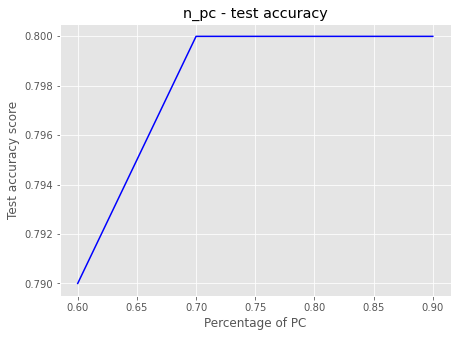

In [23]:
n_pc = [0.6, 0.7,0.8,0.9]
plt.figure(figsize=(7,5))
plt.style.use('ggplot')
plt.plot(n_pc, test_scores_pca,c='b')
plt.title('n_pc - test accuracy')
plt.xlabel('Percentage of PC')
plt.ylabel('Test accuracy score')

The accuracy by increasing the number of PCs from 60% to 70%, 80% and 90% are [0.79, 0.8, 0.8, 0.8]. When percentage of PC is equal and larger than 70%, it has the highest accuracy score with 80%.

In [24]:
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs', max_iter=200)
lr = lr.fit(X_train, y_train)
y_pred_test=lr.predict(X_test)
test_scores = round(metrics.accuracy_score(y_test, y_pred_test),2)
print(test_scores)

0.82


When the PCA is not applied, the accuracy score is 82%. This is more accuracy than applied PCA method for this data.